In [98]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/home/bensonmanner/Desktop/ACME/WebbResearch/Projects/Optimization/delay-optimizer')
import os
import json
from hyperparameter_optimization import generate_learning_rates
from Optimizer_Scripts.param_optimizer_helper import test_builder
from Optimizer_Scripts import Delayer
from Optimizer_Scripts import optimizers 
from Optimizer_Scripts import functions
from mpl_toolkits.mplot3d import axes3d
%matplotlib notebook

# Helper Functions

In [101]:
def run_single_start(delayer, x_init, maxiter=1000, tol=1e-5, use_delays=True):
    delayer.x_init = x_init
    delayer.compute_time_series(tol=tol, maxiter=maxiter, use_delays=use_delays)
    return delayer

def plot_on_axis(axis, dim_tuple, delayer):
    #plot the results according to the given delayer
    length = len(delayer.time_series[1:,dim_tuple[0]])
    s = np.linspace(5,100,len(delayer.time_series[1:,dim_tuple[0]]))
    axis.scatter(delayer.time_series[1:,dim_tuple[0]], delayer.time_series[1:,dim_tuple[1]],delayer.loss_list, s=s)
    axis.set_xlabel("Dimension {}".format(dim_tuple[0]))
    axis.set_ylabel("Dimension {}".format(dim_tuple[1]))
    
def plot_2d_single(delayer, plot_dims=[(0,1)], cost='Ackley'):
    title = "{}: {} Optimizer: {} Dimensions: {} is max delay".format(cost, delayer.Optimizer.name, delayer.n, delayer.max_L)
    fig=plt.figure(figsize=(8,6*len(plot_dims)))
    for it in range(len(plot_dims)):
        dim_tuple = plot_dims[it]
        axis = fig.add_subplot(projection='3d')
        plot_on_axis(axis, dim_tuple, delayer)
    fig.suptitle(title)

#  2 Dimensional Test

### Undelayed Optimal Parameters Test

Iteration:849, Loss:2.5799275583127756:  85%|████████▌ | 850/1000 [00:00<00:00, 2030.25it/s] 


<IPython.core.display.Javascript object>


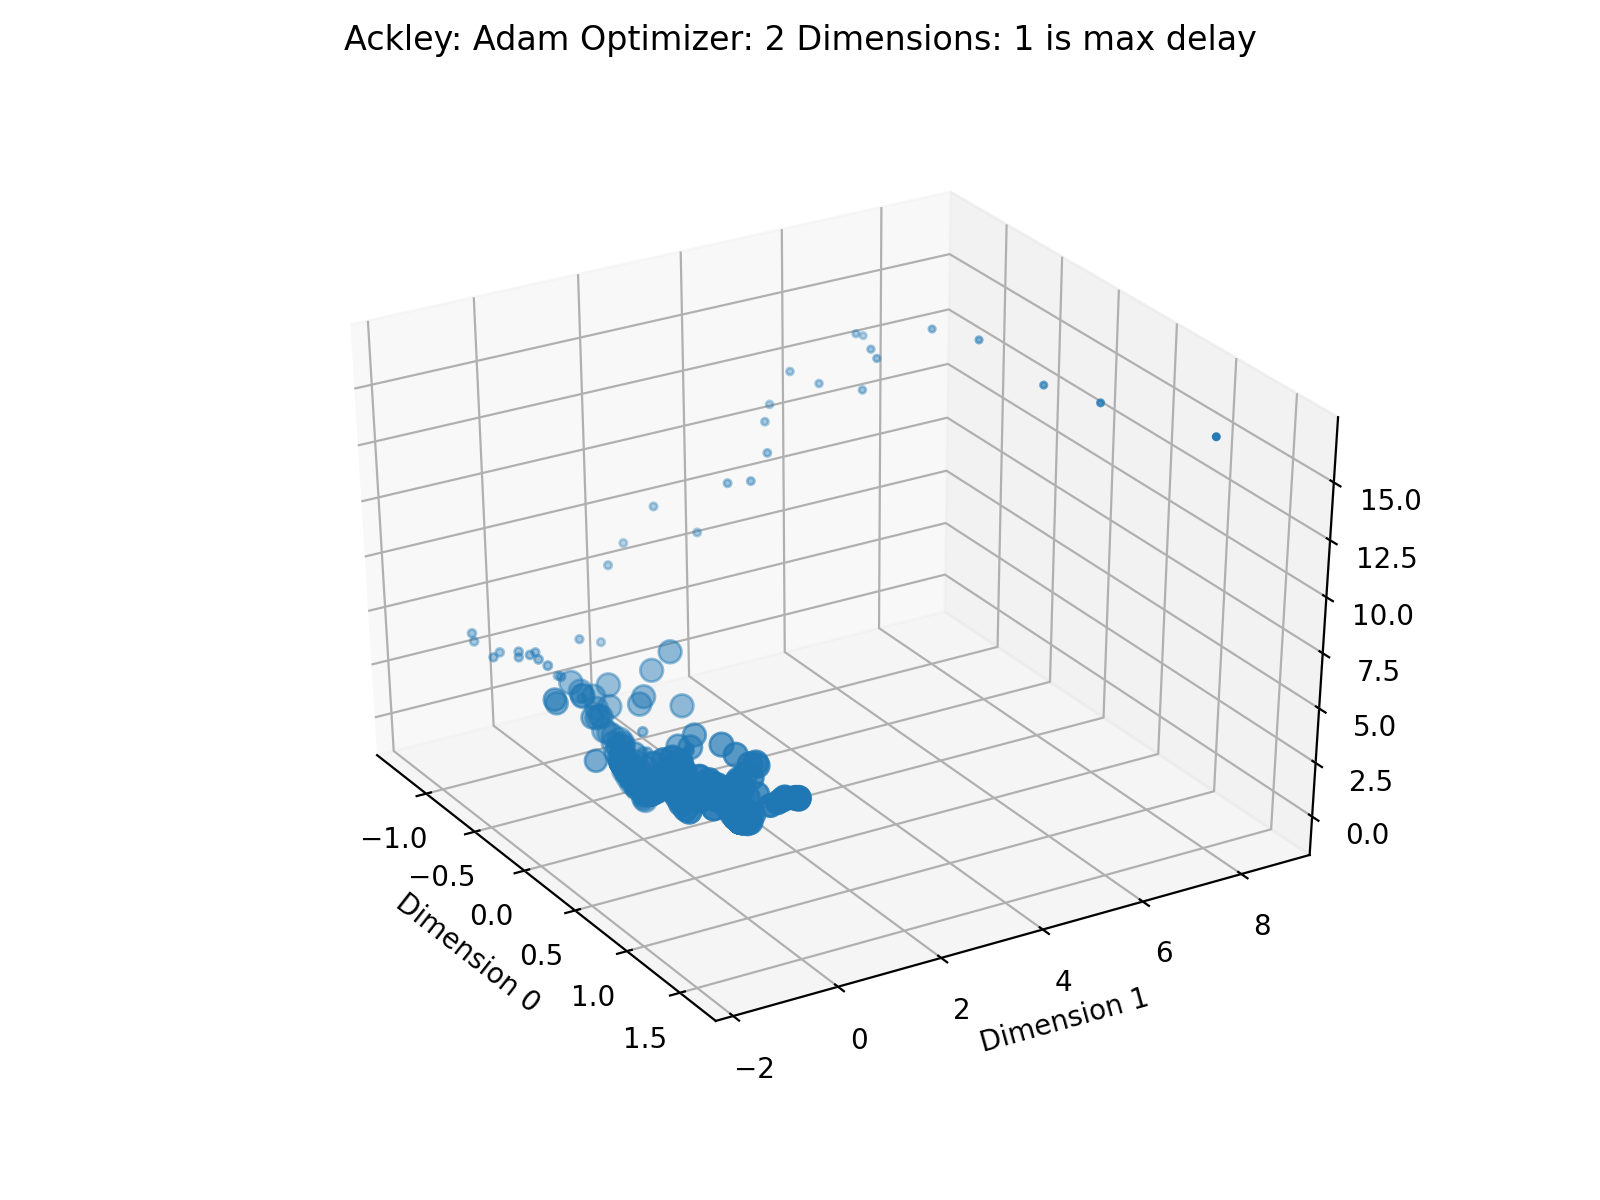

In [102]:
n=2
x_init = np.random.uniform(-32.,32.,n)
loss=functions.ackley_gen(n)
grad=functions.ackley_deriv_gen(n)
max_L=1
num_delays=1000
params = dict()
params['beta_1'] = 0.9
params['beta_2'] = 0.999
gen_params = {'step_size': 550, 'min_learning_rate': 0.75, 'max_learning_rate': 3.0}
params['learning_rate'] = generate_learning_rates(False, gen_params)
adam = optimizers.Adam(params)
delayer = Delayer.Delayer(n, adam, loss, grad, max_L=max_L, 
                          num_delays=num_delays, logging=True)
delayer = run_single_start(delayer=delayer, x_init=x_init, use_delays=False)
plot_2d_single(delayer)

### Delayed Optimal Parameters Test

### Undelayed Equal Parameters Test

### Delayed Equal Parameters Test

# 10 Dimensional Test